# Accent detection using MFCC

Current approach is to formulate the accent detection problem as a classification problem using the MFCCs of audio files.

pydub is the python audio processing library used in this work with librosa being used for the MFCC calculations.

Data pre processing + model architecture adapted from work in this paper: http://cs229.stanford.edu/proj2017/final-reports/5244230.pdf

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import librosa
from scipy.io import wavfile as wav
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pathlib import Path

In [2]:
recordings_dir = Path('C:/Users/omar_/Documents/cockatoos/data/accent_samples/recordings/recordings')
recordings_dir_wav = Path('C:/Users/omar_/Documents/cockatoos/data/accent_samples/recordings/recordings_wav')
recordings_dir_chunk = Path('C:/Users/omar_/Documents/cockatoos/data/accent_samples/recordings/recordings_chunk')
recordings_dir_slice =  Path('C:/Users/omar_/Documents/cockatoos/data/accent_samples/recordings/recordings_slice')
recordings_dir_standardized = Path('C:/Users/omar_/Documents/cockatoos/data/accent_samples/recordings/recordings_standardized')

In [3]:
test = recordings_dir.parent / "afrikaans1.mp3"
print(test)

C:\Users\omar_\Documents\cockatoos\data\accent_samples\recordings\afrikaans1.mp3


In [4]:
print(recordings_dir)
print(recordings_dir_wav)

C:\Users\omar_\Documents\cockatoos\data\accent_samples\recordings\recordings
C:\Users\omar_\Documents\cockatoos\data\accent_samples\recordings\recordings_wav


In [88]:
#Convert data to wav format if needed

for i, filename in enumerate(os.listdir(recordings_dir)):
    
    if i % 100 == 0:
        print(i)
    
    src = recordings_dir / filename
    dst = recordings_dir_wav / (filename[:-3] +'wav')
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


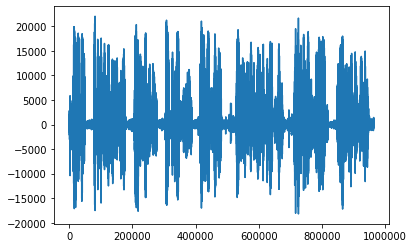

In [4]:
test_f = recordings_dir_wav / "english1.wav"
rate, data = wav.read(test_f)
plt.plot(data)
plt.show()

In [5]:
#Attempt to generate word segments from continuous piece of audio by thresholding on silence

sound_file = AudioSegment.from_wav(test_f)
audio_chunks = split_on_silence(sound_file, 
    # must be silent for at least half a second
    min_silence_len = 80,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-30
)

#Save each segment of audio as a separate file

print(len(audio_chunks))

# for i, chunk in enumerate(audio_chunks):
#     out_file = recordings_dir_chunk / f"chunk{i}.wav"
#     chunk.export(out_file, format="wav")

48


In [8]:
a = audio_chunks[0]
b = a + AudioSegment.silent(duration=1000)
print(len(b))
# np_chunk = np.frombuffer(a.get_array_of_samples(), dtype=np.float16)
# m = librosa.feature.mfcc(y=np_chunk, sr=22050)

1519


In [7]:
#Length of audio segment before calculating MFCC will need to be standardized either by trimming or adding silence
#Easisest way to do this is based on AudioSegments (array in milliseconds)
#Trimming is self explanatory and padding can be done by adding a silence segment

test_f = recordings_dir_wav / "english1.wav"
audio_seg = AudioSegment.from_wav(test_f)

#Trim segment to include only the first one second

audio_seg_1sec = audio_seg[0:1000]

#Pad segment by an extra second

audio_seg_extra = audio_seg + AudioSegment.silent(duration=1000)

In [6]:
# Make all audio segments the same length (In this case 0.5 seconds)

for i, filename in enumerate(os.listdir(recordings_dir_chunk)):
    src = recordings_dir_chunk / filename
    seg = AudioSegment.from_wav(src)
    seg_len = len(seg)
    
    if seg_len >= 500:
        seg_standardized = seg[0:500]
    else:
        seg_standardized = seg + AudioSegment.silent(duration=(500 - seg_len))
        
    seg_standardized.export(recordings_dir_standardized / f"{filename[:-4]}.wav",format="wav")

In [7]:
for i, filename in enumerate(os.listdir(recordings_dir_standardized)):
    src = recordings_dir_standardized/ filename
    seg = AudioSegment.from_wav(src)
    seg_len = len(seg)
    print(f"Chunk {i} length {seg_len}")

Chunk 0 length 500
Chunk 1 length 500
Chunk 2 length 500
Chunk 3 length 500
Chunk 4 length 500
Chunk 5 length 500
Chunk 6 length 500
Chunk 7 length 500
Chunk 8 length 500
Chunk 9 length 500
Chunk 10 length 500
Chunk 11 length 500
Chunk 12 length 500
Chunk 13 length 500
Chunk 14 length 500
Chunk 15 length 500
Chunk 16 length 500
Chunk 17 length 500
Chunk 18 length 500
Chunk 19 length 500
Chunk 20 length 500
Chunk 21 length 500
Chunk 22 length 500
Chunk 23 length 500
Chunk 24 length 500
Chunk 25 length 500
Chunk 26 length 500
Chunk 27 length 500
Chunk 28 length 500
Chunk 29 length 500
Chunk 30 length 500
Chunk 31 length 500
Chunk 32 length 500
Chunk 33 length 500
Chunk 34 length 500
Chunk 35 length 500
Chunk 36 length 500
Chunk 37 length 500
Chunk 38 length 500
Chunk 39 length 500
Chunk 40 length 500
Chunk 41 length 500
Chunk 42 length 500
Chunk 43 length 500
Chunk 44 length 500
Chunk 45 length 500
Chunk 46 length 500
Chunk 47 length 500


In [39]:
for i, filename in enumerate(os.listdir(recordings_dir_standardized)):
    
    src = recordings_dir_chunk / filename
    y, sr = librosa.load(src)
    m = librosa.feature.mfcc(y=y, sr=sr)
    print(m.shape)
    break
    

(20, 23)


In [7]:
test_c = recordings_dir_chunk / "chunk5.wav"
y, sr = librosa.load(test_c)
m = librosa.feature.mfcc(y=y, sr=sr)

In [28]:
print(sr)

22050


In [16]:
print(y.shape)
print(sr)
print(m.shape)

(11819,)
22050
(20, 24)


In [19]:
print(m[:,0])
mfcc_delta = librosa.feature.delta(m, order=1)
print(mfcc_delta.shape)

[-3.2125232e+02  9.0521378e+01  2.7228752e+01  4.3222569e+01
  2.3360477e+01  2.6514725e+01  1.6163609e+01  1.5952240e+01
 -1.5531508e+01 -8.4569864e+00 -6.0969663e+00  6.3410044e-02
 -1.1836134e+01 -1.8409029e+00 -1.2836340e+01  6.2185168e+00
 -2.6788561e+00  8.2192945e-01 -2.2138951e+00  8.0116100e+00]
(20, 24)


In [13]:
test_slice = recordings_dir_wav / "english1.wav"
s = AudioSegment.from_wav(test_slice)[0:5000]
s.export(recordings_dir_slice / "test1.wav",format="wav")

<_io.BufferedRandom name='C:\\Users\\omar_\\Documents\\cockatoos\\data\\accent_samples\\recordings\\recordings_slice\\test1.wav'>